In [250]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data Reading & Manipulation

In [253]:
df=pd.read_csv('ds_salaries.csv')

In [255]:
df.head()

,Column1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_Smallize
0,1,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,2,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,3,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,4,2020,Mid-Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,5,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Column1             607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_Smallize    607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [259]:
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')

In [261]:
df['work_year'] = df['work_year'].dt.year

In [263]:
df.head()

,Column1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_Smallize
0,1,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,2,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,3,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,4,2020,Mid-Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,5,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Column1             607 non-null    int64 
 1   work_year           607 non-null    int32 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_Smallize    607 non-null    object
dtypes: int32(1), int64(4), object(7)
memory usage: 54.7+ KB


In [267]:
df.rename(columns={'company_Smallize':'company_size'},inplace=True)
df.head()

,Column1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,1,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,2,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,3,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,4,2020,Mid-Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,5,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


In [269]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [271]:
def categorize_job(title):
    if 'Data Scientist' in title or 'Data Science' in title:
        return 'Data Science & Analysis'
    elif 'Machine Learning' in title or 'ML' in title or 'AI' in title:
        return 'Machine Learning & AI'
    elif 'Data Engineer' in title or 'Engineering' in title or 'ETL' in title:
        return 'Data Engineering'
    elif 'Data Analyst' in title or 'Analytics' in title or 'BI' in title:
        return 'Data Analysis & BI'
    elif 'Research Scientist' in title or 'Computer Vision' in title or 'NLP' in title:
        return 'Specialized Roles'
    elif 'Director' in title or 'Head' in title or 'Manager' in title:
        return 'Leadership Roles'
    else:
        return 'Other'

df['Category'] = df['job_title'].apply(categorize_job)

df_other = df[df['Category'] == 'Other']
df = df[df['Category'] != 'Other']


In [273]:
df.head()

,Column1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Category
0,1,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large,Data Science & Analysis
1,2,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small,Machine Learning & AI
2,3,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium,Data Engineering
3,4,2020,Mid-Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small,Data Analysis & BI
4,5,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large,Machine Learning & AI


# Job Categories by Salaries

In [276]:
top_jobs=df.groupby('Category')['salary_in_usd'].sum().sort_values(ascending=False).reset_index()

In [278]:
top_jobs.head(10)

,Category,salary_in_usd
0,Data Science & Analysis,22872092
1,Data Engineering,18407659
2,Data Analysis & BI,13344982
3,Machine Learning & AI,8148726
4,Specialized Roles,2369219
5,Leadership Roles,800813


C:\Users\2024\AppData\Local\Temp\ipykernel_7824\1270668805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_jobs,x='Category',y='salary_in_usd',palette='bright')


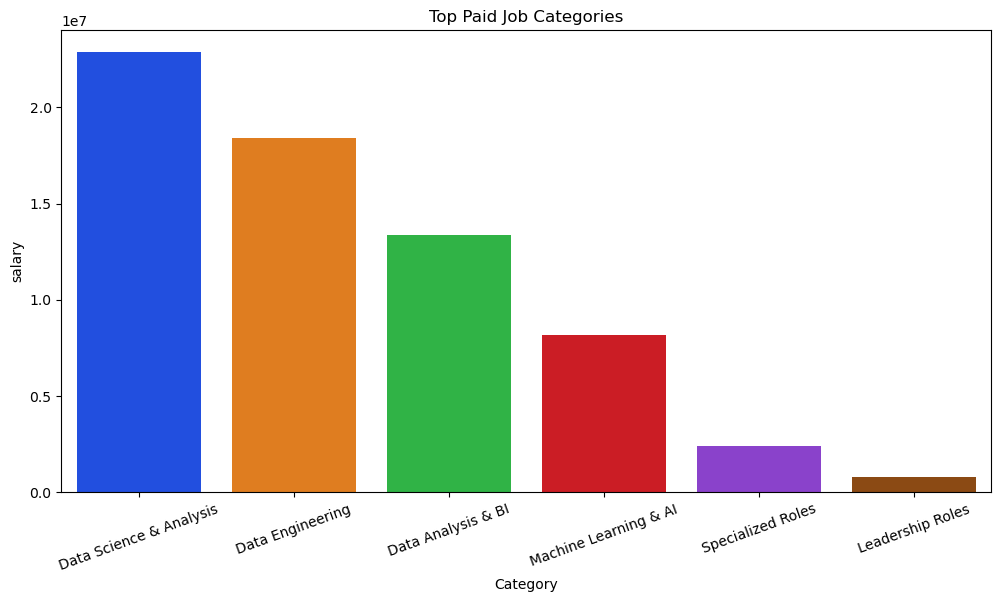

In [280]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_jobs,x='Category',y='salary_in_usd',palette='bright')
plt.title('Top Paid Job Categories')
plt.xlabel('Category')
plt.ylabel('salary')
plt.xticks(rotation=20)
plt.show()

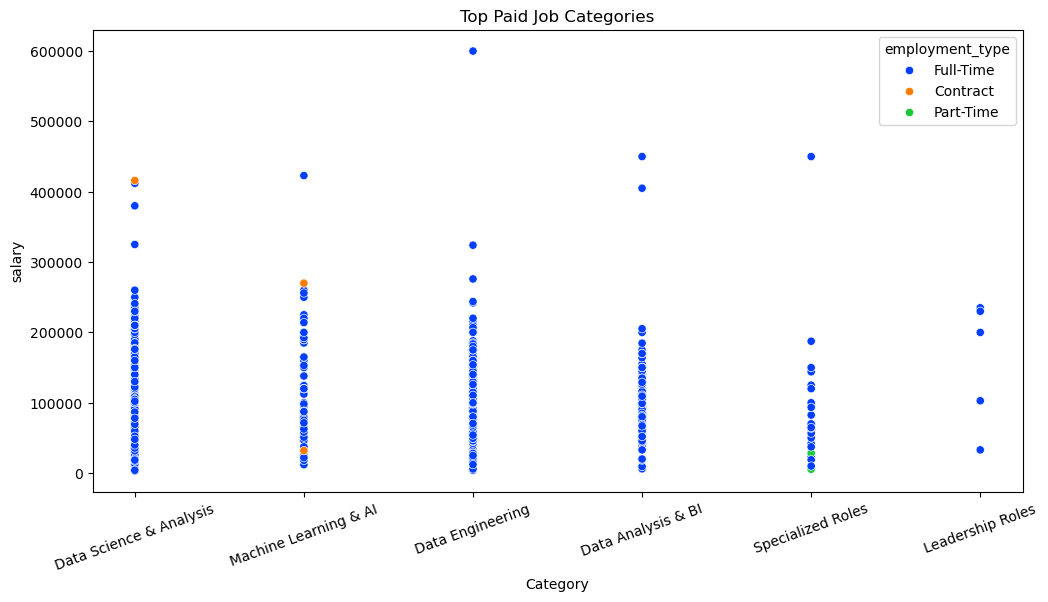

In [282]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Category',y='salary_in_usd',palette='bright',hue='employment_type')
plt.title('Top Paid Job Categories')
plt.xlabel('Category')
plt.ylabel('salary')
plt.xticks(rotation=20)
plt.show()

# Impact of remote work on compensation  

In [285]:
df['remote_category']=pd.cut(df['remote_ratio'],bins=[-1,0,50,100],labels=['On-site','Hybrid','Fully Remote'])

In [287]:
df.head()

,Column1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Category,remote_category
0,1,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large,Data Science & Analysis,On-site
1,2,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small,Machine Learning & AI,On-site
2,3,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium,Data Engineering,Hybrid
3,4,2020,Mid-Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small,Data Analysis & BI,On-site
4,5,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large,Machine Learning & AI,Hybrid


In [289]:
remote_stats=df.groupby('remote_ratio')['salary_in_usd'].describe()
print(remote_stats)

              count           mean           std     min      25%       50%  \
remote_ratio                                                                  
0             127.0  106354.622047  67724.540800  2859.0  60000.0   99000.0   
50             98.0   80630.377551  57615.763296  5409.0  50000.5   68010.5   
100           369.0  120690.181572  72819.159896  4000.0  72500.0  112900.0   

                   75%       max  
remote_ratio                      
0             140400.0  450000.0  
50             99070.5  423000.0  
100           156600.0  600000.0  


C:\Users\2024\AppData\Local\Temp\ipykernel_7824\1118133306.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='remote_category' , y='salary_in_usd' , data=df,palette='Set1')


Text(0, 0.5, 'Salary')

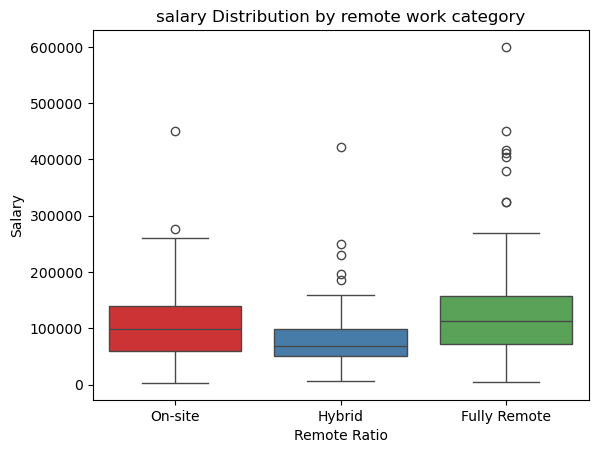

In [291]:
sns.boxplot(x='remote_category' , y='salary_in_usd' , data=df,palette='Set1')
plt.title('salary Distribution by remote work category')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')

C:\Users\2024\AppData\Local\Temp\ipykernel_7824\1899926696.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='remote_category' , y='salary_in_usd' , data=df,palette='Set1')


Text(0, 0.5, 'Salary')

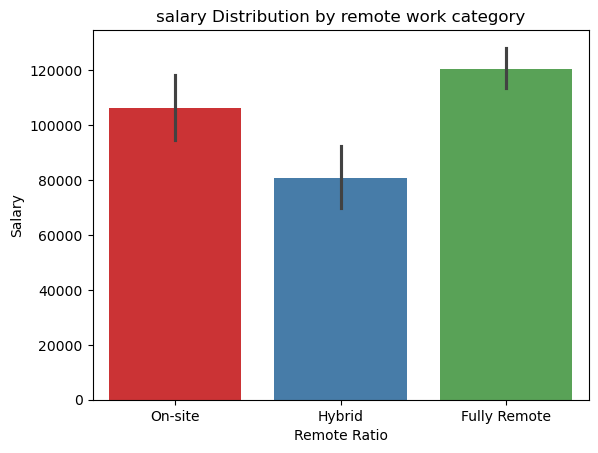

In [293]:
sns.barplot(x='remote_category' , y='salary_in_usd' , data=df,palette='Set1')
plt.title('salary Distribution by remote work category')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')

# Comparing Salaries between Full-time & Part-time

C:\Users\2024\AppData\Local\Temp\ipykernel_7824\3718235832.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='employment_type', y='salary_in_usd', data=df,palette='Set1')


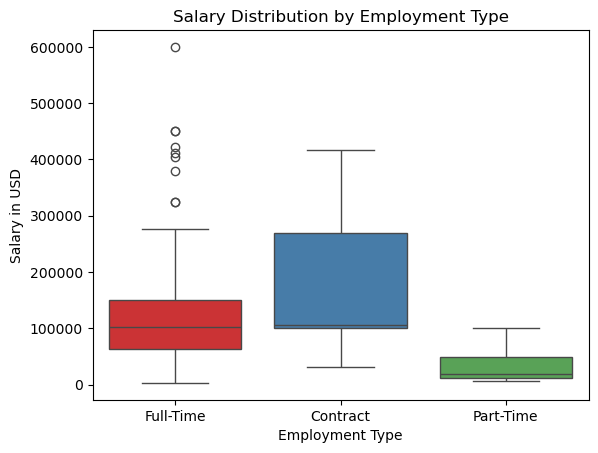

In [296]:
sns.boxplot(x='employment_type', y='salary_in_usd', data=df,palette='Set1')
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()


In [298]:
from scipy import stats

full_time_salaries = df[df['employment_type'] == 'Full-Time']['salary_in_usd']
part_time_salaries = df[df['employment_type'] == 'Part-Time']['salary_in_usd']
t_stat, p_value = stats.ttest_ind(full_time_salaries, part_time_salaries, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 7.5907394237313754
P-value: 1.349291215030413e-05


#### when the T-stat is very high and the p-value is very low it means that there's big diffrence in the salaries between them due to employment type

# Correlation Between company size and employee salaries

In [302]:
size_salaries=df.groupby('salary_in_usd')['company_size'].value_counts().unstack().fillna(0)

In [304]:
size_salaries.head()

company_size,Large,Medium,Small
salary_in_usd,,,
2859,0.0,0.0,1.0
4000,0.0,2.0,0.0
5409,0.0,1.0,0.0
5679,0.0,0.0,1.0
5707,0.0,1.0,0.0


In [306]:
size_salaries=df.groupby('salary_in_usd')['company_size'].value_counts().unstack().fillna(0)
size_salaries['Total'] = size_salaries.sum(axis=1)
size_salaries = size_salaries.sort_values(by='Total', ascending=False)
print(size_salaries)

company_size   Large  Medium  Small  Total
salary_in_usd                             
100000           4.0     9.0    2.0   15.0
120000           4.0     5.0    3.0   12.0
150000           4.0     6.0    1.0   11.0
200000           6.0     4.0    0.0   10.0
135000           4.0     5.0    0.0    9.0
...              ...     ...    ...    ...
66265            1.0     0.0    0.0    1.0
66022            0.0     0.0    1.0    1.0
65013            0.0     1.0    0.0    1.0
64849            1.0     0.0    0.0    1.0
600000           1.0     0.0    0.0    1.0

[360 rows x 4 columns]


In [308]:
size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
df['company_size_numeric'] = df['company_size'].map(size_mapping)

In [310]:
df.head()

,Column1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Category,remote_category,company_size_numeric
0,1,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large,Data Science & Analysis,On-site,3
1,2,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small,Machine Learning & AI,On-site,1
2,3,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium,Data Engineering,Hybrid,2
3,4,2020,Mid-Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small,Data Analysis & BI,On-site,1
4,5,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large,Machine Learning & AI,Hybrid,3


In [312]:
correlation=df['salary_in_usd'].corr(df['company_size_numeric'])
print(correlation)

0.15124350406154313


#### when the correlation is too low this means that the company size isn't correalated that strong to the salaries but it tends when the company larger the salary is a bit greater but not that much 

C:\Users\2024\AppData\Local\Temp\ipykernel_7824\2978848605.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_size', y='salary_in_usd', data=df,palette='Set1')


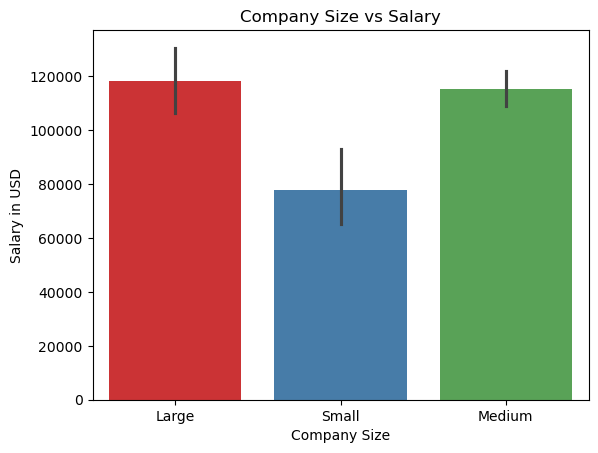

In [315]:
sns.barplot(x='company_size', y='salary_in_usd', data=df,palette='Set1')
plt.title('Company Size vs Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

# Forecasting salaries based on experience and job roles

In [321]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

features = ['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size_numeric']
target = 'salary_in_usd'

X = df[features]
y = df[target]

categorical_features = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print(f"Model R^2 score: {model.score(X_test, y_test)}")

example = pd.DataFrame([{
    'work_year': 2024,
    'experience_level': 'SE',
    'employment_type': 'FT',
    'job_title': 'Data Scientist',
    'employee_residence': 'US',
    'remote_ratio': 100,
    'company_location': 'US',
    'company_size_numeric': 500
}])

predicted_salary = model.predict(example)
print(f"Predicted salary: ${predicted_salary[0]:,.2f}")


Model R^2 score: 0.07177222970620767
Predicted salary: $2,995,083.35


#### due to the predicted salary is unusually high this indicates that the model is overfitting and the model isn't capturing the relation between the features and the targeting bec the model r2 is is too low